In [27]:
%matplotlib inline

In [17]:
import numpy as np
import scipy as sp
import pandas as pd
import os 
import pickle
from collections import Counter
from pathlib import Path
import csv
import multiprocessing as mp
import re
import ast

In [19]:
mfest = pd.read_pickle('fcs_metadata.pkl')
mfest

,Subject Accession,Species,Race,Race Specify,Ethnicity,Strain,Gender,Age Event,Age Event Specify,Subject Age,...,File Info ID,File Detail,File Name,Original File Name,fcs,pkl,pkl_exists,n_rows,n_columns,markers
0,SUB137160,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,44,...,573505,CyTOF result,RC4 11-0005_cells_found.573505.fcs,RC4 11-0005_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,150607.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
2,SUB137169,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,41,...,573507,CyTOF result,Mm 041513-RC4-11-0015_cells_found.573507.fcs,Mm 041513-RC4-11-0015_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,317311.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
4,SUB137172,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,45,...,573509,CyTOF result,RC4-11-0018_cells_found.573509.fcs,RC4-11-0018_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,222633.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
6,SUB137174,Homo sapiens,Black or African American,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,53,...,573511,CyTOF result,11-0020_cells_found.573511.fcs,11-0020_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,244654.0,28.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
8,SUB137182,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Male,Age at enrollment,NaN,71,...,573513,CyTOF result,053012-MeenaRC4 11-0029_cells_found.573513.fcs,053012-MeenaRC4 11-0029_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,412433.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573807,CyTOF result,2318--RC4 1213 control_cells_found.573807.fcs,2318--RC4 1213 control_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,200180.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
549,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573808,CyTOF result,RC4 1213controlB_cells_found.573808.fcs,RC4 1213controlB_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,100833.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
551,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573809,CyTOF result,RC4-1213-1control_cells_found.573809.fcs,RC4-1213-1control_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,264809.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
553,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573810,CyTOF result,RC41213 control_cells_found.573810.fcs,RC41213 control_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,143618.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."


In [31]:
mfest.columns

Index(['Subject Accession', 'Species', 'Race', 'Race Specify', 'Ethnicity',
       'Strain', 'Gender', 'Age Event', 'Age Event Specify', 'Subject Age',
       'Age Unit', 'Subject Phenotype', 'ARM Accession', 'ARM Name',
       'Study Accession', 'Study Brief Title', 'Biosample Accession',
       'Biosample Description', 'Biosample Name', 'Biosample Type',
       'Biosample Subtype', 'Study Time Collected',
       'Study Time Collected Unit', 'Study Time T0 Event',
       'Study Time T0 Event Specify', 'Biosample Treatment',
       'Planned Visit Accession', 'Planned Visit Name', 'Experiment Accession',
       'Expsample Accession', 'Expsample Description',
       'Expsample Result Schema', 'Expsample Treatement', 'Reagent Accession',
       'Reagent Name', 'Reagent Reporter Name', 'File Info ID', 'File Detail',
       'File Name', 'Original File Name', 'fcs', 'pkl', 'pkl_exists', 'n_rows',
       'n_columns', 'markers'],
      dtype='object')

In [20]:
def arcsinh(x):
    return(np.arcsinh(x/5))

In [21]:
marker_counts = Counter()
for markers in mfest['markers']:
    marker_counts.update(markers)
marker_counts

Counter({'CELL_LENGTH': 284,
         'DEAD': 284,
         'CD19': 284,
         'CD4': 284,
         'CD8': 284,
         'IGD': 284,
         'CD85J': 284,
         'CD16': 284,
         'CD3': 284,
         'CD38': 284,
         'CD27': 284,
         'CD14': 284,
         'CD94': 284,
         'CCR7': 284,
         'CD45RA': 284,
         'CD20': 284,
         'CD127': 284,
         'CD33': 284,
         'CD28': 284,
         'CD24': 284,
         'CD161': 284,
         'TCRGD': 284,
         'CD56': 284,
         'HLADR': 284,
         'CD25': 284,
         'DNA1': 284,
         'DNA2': 284,
         '(BA138)DD': 51,
         'CXCR3': 1,
         'PD-1': 1})

In [23]:
markers = []
max_count = max(marker_counts.values())
for marker, count in marker_counts.items():
    if count == max_count:
        markers.append(marker)
markers

['CELL_LENGTH',
 'DEAD',
 'CD19',
 'CD4',
 'CD8',
 'IGD',
 'CD85J',
 'CD16',
 'CD3',
 'CD38',
 'CD27',
 'CD14',
 'CD94',
 'CCR7',
 'CD45RA',
 'CD20',
 'CD127',
 'CD33',
 'CD28',
 'CD24',
 'CD161',
 'TCRGD',
 'CD56',
 'HLADR',
 'CD25',
 'DNA1',
 'DNA2']

In [24]:
def filter_by_markers(df, q_markers):
    q_markers = set(q_markers)
    return df[df.apply(
        lambda row: len(q_markers & set(row['markers'])) == len(q_markers),
    axis=1
    )]   
samples = filter_by_markers(mfest, markers)
samples = samples[samples.n_rows>row_cutoff]
samples.shape

(284, 46)

count       284.000000
mean     247320.732394
std       86335.894452
min       48542.000000
25%      194455.500000
50%      247200.500000
75%      299832.000000
max      647463.000000
Name: n_rows, dtype: float64


<AxesSubplot:ylabel='Frequency'>

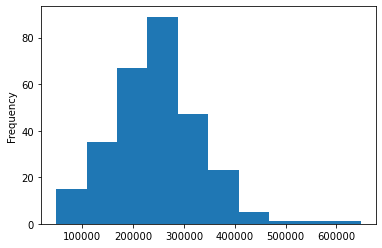

In [30]:
print(samples.n_rows.describe())
samples.n_rows.plot.hist()

In [ ]:
row_cutoff = int(1e4)

count    284.000000
mean      70.897887
std       16.845173
min       41.000000
25%       56.000000
50%       71.000000
75%       84.000000
max       99.000000
Name: Subject Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

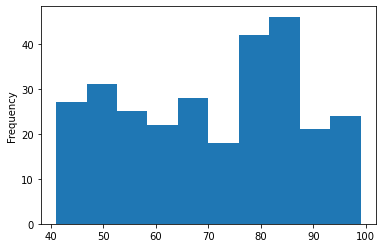

In [32]:
print(samples['Subject Age'].describe())
samples['Subject Age'].plot.hist()

In [33]:
pd.read_pickle(samples.iloc[0].pkl)

,CELL_LENGTH,DEAD,CD19,CD4,CD8,IGD,CD85J,CD16,CD3,CD38,...,CD33,CD28,CD24,CD161,TCRGD,CD56,HLADR,CD25,DNA1,DNA2
1,26.0,-0.534810,-0.883897,1.706276,-0.389549,1.095162,49.757641,12.978461,16.902872,4687.463379,...,-0.372071,-0.027616,-0.383645,-0.906472,-0.242294,-0.225837,-0.867546,-0.280114,202.016907,431.376648
2,37.0,-0.501825,-0.987176,60.403698,-0.105791,7.882118,-0.244238,-0.173425,249.101242,38.992962,...,11.001021,-0.182922,-0.707323,-0.652739,-0.600262,-0.914205,4.501838,-0.919009,113.373032,198.430557
3,20.0,-0.937247,-0.723077,65.363335,-0.308973,1.983649,1.986390,1.593549,148.718506,67.259468,...,1.809853,3.281014,-0.941640,-0.512368,9.840481,-0.139726,-0.828036,-0.629730,162.773148,482.315369
4,22.0,-0.572791,0.669641,60.976925,3.412380,1.510986,-0.677291,0.521174,37.451569,-0.306992,...,-0.503387,19.955927,-0.111736,2.431672,-0.597246,-0.695127,-0.014068,1.166284,308.275940,470.220825
5,32.0,0.022631,-0.114596,4.590069,1.202479,0.104959,152.993073,0.917886,-0.331726,12.559181,...,142.294800,2.811678,-0.504452,-0.492080,-0.046891,1.905674,5069.940918,39.427078,168.363663,371.216034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150603,33.0,25.963648,-0.736181,-0.811943,-0.430332,-0.358188,-0.758848,0.899444,9.686301,1.237110,...,-0.356411,-0.372350,8.002898,16.131897,-0.624776,-0.286313,-0.912130,-0.679784,268.397095,434.451538
150604,25.0,-0.023051,-0.157124,78.861618,11.280008,-0.081290,-0.991805,1.676905,245.862762,463.958405,...,3.164071,14.314236,2.366328,-0.564090,-0.368061,-0.740030,-0.840149,9.426412,162.650085,315.773132
150605,10.0,15.969790,-0.945064,-0.684829,-0.750039,-0.824051,-0.132160,-0.827413,-0.809735,-0.735797,...,-0.872124,-0.455257,-0.695967,-0.560733,-0.335767,-0.446366,-0.279087,-0.120687,75.549614,63.773636
150606,41.0,-0.046112,0.961171,-0.180391,69.716980,-0.316974,-0.564795,-0.370083,123.145561,17.038406,...,0.185062,14.354417,-0.328775,184.206970,6.678673,-0.850368,-0.076979,-0.556896,203.132095,406.615112


In [34]:
def read_frame(pkl):
    df = pd.read_pickle(pkl)
    df = df[markers]
    df = df.iloc[:int(row_cutoff),:]
    df = df.apply(arcsinh)
    new_shape = list(df.shape)+[1]
    d = df.values
    d = d.reshape(new_shape)
    print(pkl.name)
    return d

In [35]:
pool = mp.Pool()

022813-Meena-RC4-11-0168-1_cells_found.573574.pkl
RC4 11-0005_cells_found.573505.pkl
RC4 11-0150_cells_found.573563.pkl
022113-Meena-RC4-11-0127_cells_found.573552.pkl
031513RC4 11-0170_cells_found.573575.pkl
11-0055_cells_found.573519.pkl
022813-Meena-RC4-11-0184_cells_found.573584.pkl
053012-MeenaRC4 11-0077_cells_found.573532.pkl
053012-MeenaRC4 11-0104_cells_found.573542.pkl
022113-Meena-RC4-11-0130-1_cells_found.573553.pkl
Mm 041513-RC4-11-0015_cells_found.573507.pklRC4-11-0171_cells_found.573576.pkl

RC4 11-0151_cells_found.573564.pkl
022813-Meena-RC4-11-0185_cells_found.573585.pkl
11-0057_cells_found.573520.pkl
11-0078_cells_found.573533.pkl
032113MeenaRC4 11-0135_cells_found.573554.pkl
022113-Meena-RC4-11-0156_cells_found.573566.pkl
RC4 11-0187_cells_found.573586.pkl
032014-RC4 11-0176_cells_found.573577.pklRC4-11-0018_cells_found.573509.pkl

11-0111_cells_found.573543.pkl
11-0080_cells_found.573534.pkl
022113-Meena-RC4-11-0136c_cells_found.573556.pkl
022113-Meena-RC4-11-0157_c

In [36]:
expr_list = pool.map(read_frame, samples.pkl)
expr_list = np.stack(expr_list)
print("The dimenstion of the data is: ", expr_list.shape)

The dimenstion of the data is:  (284, 20000, 27, 1)


In [37]:
pool.close()
pool.terminate()

In [39]:
allData = {
    'samples': samples,
    'expr_list': expr_list,
    'marker_names': pd.Series(markers)
}
with open('aging-cytof-data.obj','wb') as wf:
    pickle.dump(allData, wf)